<a href="https://colab.research.google.com/github/Muhammad-Awais-Awan/TensorFLow-MachineLearning/blob/main/Creating%20CNN(cifar-10)%2CData%20Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset
The CIFAR-10 dataset (Canadian Institute for Advanced Research, 10 classes) is a subset of the Tiny Images dataset and consists of 60000 32x32 color images.
The images are labelled with one of 10 mutually exclusive classes:
 * airplane
 * automobile
 * bird
 * cat
 * deer
 * dog
 * frog
 * horse
 * ship
 * truck 
 
 There are 6000 images per class with 5000 training and 1000 testing images per class.

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [3]:
#LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels)= datasets.cifar10.load_data()
#Normalize pixel values to the between 0 and 1
train_images,test_images=train_images/255.0, test_images/255.0
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


170498071/170498071 [==============================] - 8s 0us/step


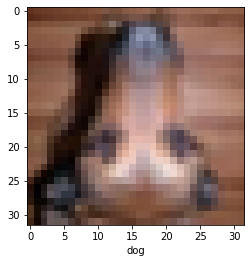

In [5]:
# let's look at a one image
IMG_INDEX=107 #change this to look at other images
plt.imshow(train_images[IMG_INDEX],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

#CNN Architecture
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few densely connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of feature.
We will start by building the Convolutional Base.

**CONVOLUTIONAL BASE**

In [6]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation="relu"))

**Layer 1**

The input shape of our data will be 32,32,3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output off each convolution operation.

**Layer 2**
This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**
The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in special dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

#Adding Dense Layers
so far we just completed the **convolutional base**.
Now we are creating ***CLASSIFIER LAYER***

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

#Training

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.5268 - accuracy: 0.4441 - val_loss: 1.2708 - val_accuracy: 0.5466
Epoch 2/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.1648 - accuracy: 0.5866 - val_loss: 1.1093 - val_accuracy: 0.6094
Epoch 3/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0169 - accuracy: 0.6427 - val_loss: 1.0337 - val_accuracy: 0.6449
Epoch 4/5
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9172 - accuracy: 0.6784 - val_loss: 0.9540 - val_accuracy: 0.6697
Epoch 5/5
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8428 - accuracy: 0.7051 - val_loss: 0.8860 - val_accuracy: 0.6951


#Evaluating the Model

In [11]:
test_loss,test_acc=model.evaluate(test_images, test_labels,verbose=2)
print(test_acc)

313/313 - 6s - loss: 0.8860 - accuracy: 0.6951 - 6s/epoch - 19ms/step
0.6951000094413757


#DATA AUGMENTATION
   generating more images from single image to increase the dataset.
   

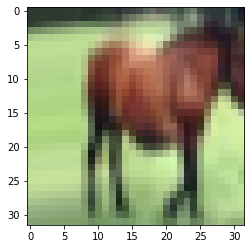

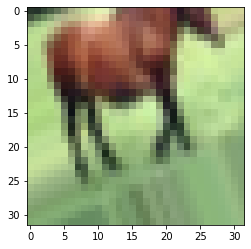

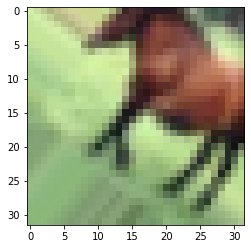

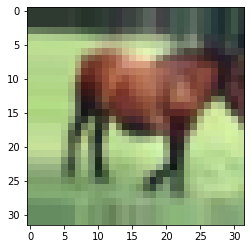

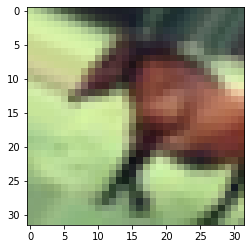

In [17]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#creates a data generator object that transforms images
datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)
#pick an image to transform
test_img=train_images[7]
img= tf.keras.preprocessing.image.img_to_array(test_img)  # convert image to numpy array
img=img.reshape((1,)+img.shape)   # reshape image
i=0

for batch in datagen.flow(img,save_prefix='test',save_format='jpeg'): # this loops run forever until we break, saving images to currenct directory
    plt.figure(i)
    plot=plt.imshow(tf.keras.preprocessing.image.img_to_array(batch[0]))
    i+=1
    if i>4: #show 4 images
      break;
plt.show()



#Using PreTrained Model
This will be done in next colab book. get it from githib repository.